Mounted at /content/drive
Temperature Prediction:
  MSE: 20619650.50618039
  R² Score: 0.03584522780440602

Microplastic Prediction:
  MSE: 7423198.002260962
  R² Score: 0.03764553693139072


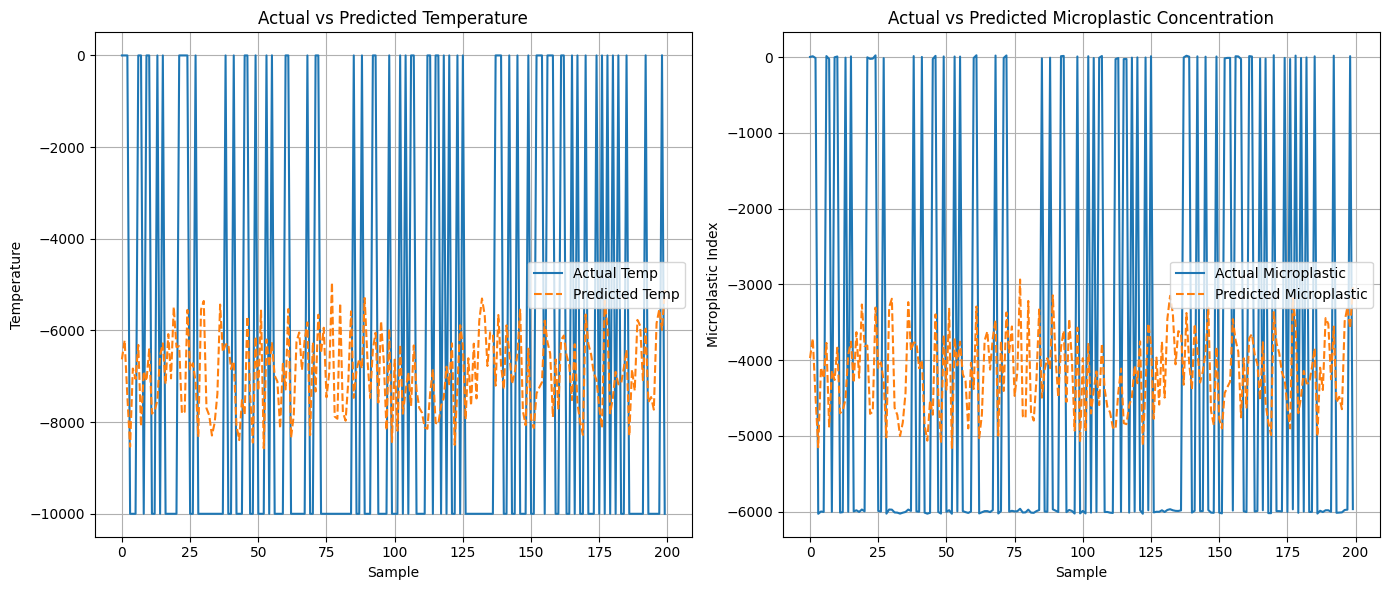

In [4]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Mount Google Drive and Load Data
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Intro to Machine Learning 4105/Level3pmR1.csv'
df = pd.read_csv(file_path, header=1)  # Skip extra header row

# 3. Clean and Prepare Data
# Replace missing values (-9999) and convert monthly values to float
monthly_columns = df.columns[2:]
df[monthly_columns] = df[monthly_columns].replace('-9999', np.nan).astype(float)

# Calculate average temperature
df['avg_temp'] = df[monthly_columns].mean(axis=1)

# Convert coordinate columns
df['longitude'] = pd.to_numeric(df['longitude (degree: E+, W-)'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude (degree: N+, S-)'], errors='coerce')

# Drop rows with NaNs
df_clean = df[['longitude', 'latitude', 'avg_temp']].dropna()

# 💡 4. Simulate Microplastic Concentration (as a function of temp and location)
np.random.seed(0)
df_clean['microplastic'] = (
    0.6 * df_clean['avg_temp'] +
    0.2 * df_clean['latitude'] -
    0.1 * df_clean['longitude'] +
    np.random.normal(0, 0.5, size=len(df_clean))
)

# 5. Feature Selection
X = df_clean[['longitude', 'latitude']]
y_temp = df_clean['avg_temp']
y_micro = df_clean['microplastic']

# 6. Train-Test Split
X_train, X_test, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, random_state=42)
_, _, y_train_micro, y_test_micro = train_test_split(X, y_micro, test_size=0.2, random_state=42)

# 7. Train Model (Linear Regression)
model_temp = LinearRegression()
model_temp.fit(X_train, y_train_temp)

model_micro = LinearRegression()
model_micro.fit(X_train, y_train_micro)

# 8. Predictions
y_pred_temp = model_temp.predict(X_test)
y_pred_micro = model_micro.predict(X_test)

# 9. Evaluation
print("Temperature Prediction:")
print("  MSE:", mean_squared_error(y_test_temp, y_pred_temp))
print("  R² Score:", r2_score(y_test_temp, y_pred_temp))

print("\nMicroplastic Prediction:")
print("  MSE:", mean_squared_error(y_test_micro, y_pred_micro))
print("  R² Score:", r2_score(y_test_micro, y_pred_micro))

# 10. Plot Actual vs Predicted (Temperature and Microplastics)
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.plot(y_test_temp.values[:200], label='Actual Temp')
plt.plot(y_pred_temp[:200], label='Predicted Temp', linestyle='--')
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Sample")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(y_test_micro.values[:200], label='Actual Microplastic')
plt.plot(y_pred_micro[:200], label='Predicted Microplastic', linestyle='--')
plt.title("Actual vs Predicted Microplastic Concentration")
plt.xlabel("Sample")
plt.ylabel("Microplastic Index")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
